# This file contains all post processing steps taken for the dataset

In [1]:
# environment setup
import os
import random
from multiprocessing import Pool

import cv2
import pandas as pd
import numpy as np

import seaborn as sns

from helpers.data_loader import file_loader, multiple_file_loader, VideoIterator
from helpers.data_processing import interpolate, gen_gaussian_blob

In [2]:
class FLAGS:
    video_path = '/data/side_seing/sideseeing-hospitals/data/Santos_CHE/Block01-2024-03-09-15-43-12-506/video.mp4'
    anntation_path = "runs/suayder's annotation/santos_she/Block01-2024-03-09-15-43-12-506"
    save_folder = 'runs/Santos_CHE/Block01-2024-03-09-15-43-12-506/'


#### Single point experiments

Steps:
1. Interpolate the points to get points for every frame
2. generate masks for every point & save

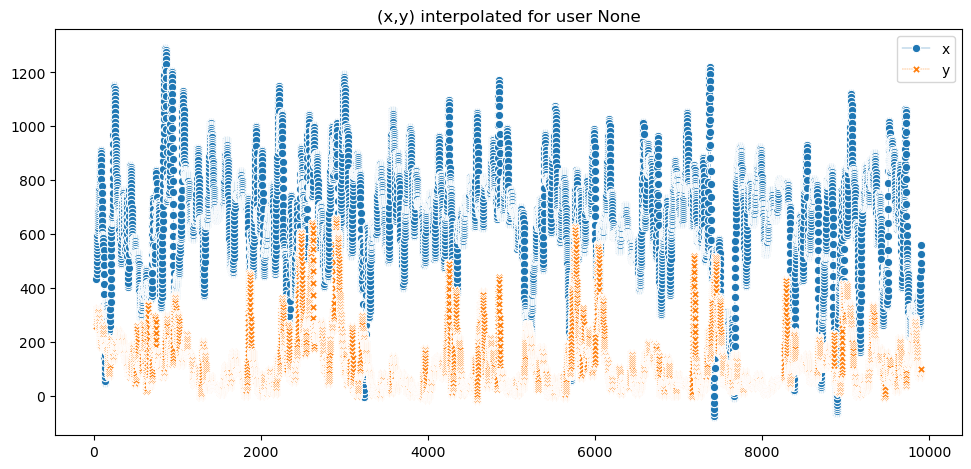

,x,y
31,433,260
32,450,269
33,467,278
34,483,286
35,498,293
...,...,...
9894,440,85
9895,466,89
9896,494,92
9897,525,96


In [3]:
# interpolate the points to show all frames

frame_clicks = file_loader(FLAGS.anntation_path)
interp_frame_clicks = interpolate(frame_clicks)
interp_frame_clicks

In [6]:
# generate masks for every points and save
vid_iterator = VideoIterator(FLAGS.video_path)
image_shape = (vid_iterator.width, vid_iterator.height)

points = list(zip(interp_frame_clicks['x'], interp_frame_clicks['y']))

def gen_blob_and_save(point):
    mask = gen_gaussian_blob(image_shape, point[1], point[2], sigma=120, denormalize=True)
    cv2.imwrite(os.path.join(FLAGS.save_folder, f'{point[0]}.png'), mask)
    return

with Pool(5) as p:
    p.map(gen_blob_and_save, interp_frame_clicks.reset_index().to_numpy())